In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data_dir = '/Users/boyuliu/pyprojects/Joann/Joann-Thailand-Project/notebooks/datasets/new_dataset/'
reg_data = pd.read_csv(data_dir+'regression_data_wv_cases1_20210301.csv')
reg_data.head()

,province,year_week,total_demand,perc_abuse,wv_count,ex_rate,fake_date,month,quarter,ex_rate_diff,...,total_demand_plus_7,total_demand_plus_8,total_demand_minus_1,total_demand_minus_2,total_demand_minus_3,total_demand_minus_4,total_demand_minus_5,total_demand_minus_6,total_demand_minus_7,total_demand_minus_8
0,Ang Thong,2018-02,0.0,0.0,0.0,5.00602,2018-01-08,2018-01,2018-1,-0.032813,...,NaN,NaN,0.0,0.0,10.0,0.0,0.0,0.0,15.0,0.0
1,Ang Thong,2018-03,0.0,0.0,0.0,5.02540,2018-01-15,2018-01,2018-1,0.019380,...,NaN,NaN,0.0,10.0,0.0,0.0,0.0,15.0,0.0,0.0
2,Ang Thong,2018-04,0.0,0.0,0.0,5.03024,2018-01-22,2018-01,2018-1,0.004840,...,NaN,NaN,10.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0
3,Ang Thong,2018-05,10.0,0.0,0.0,5.03048,2018-01-29,2018-01,2018-1,0.000240,...,NaN,NaN,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0
4,Ang Thong,2018-06,0.0,0.0,0.0,5.08050,2018-02-05,2018-02,2018-1,0.050020,...,NaN,NaN,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0


In [7]:
[f for f in os.listdir(data_dir) if f.endswith('20210301.csv')]

['regression_data_wv_cases1_20210301.csv',
 'regression_data_wv_cases1_causal_ma_detrend_20210301.csv',
 'regression_data_wv_cases1_causal_ma_detrend_12w_20210301.csv',
 'regression_data_large_p_wv_cases1_20210301.csv',
 'regression_data_wv_cases2_20210301.csv',
 'regression_data_wv_cases1_causal_ma_detrend_8w_20210301.csv',
 'regression_data_wv_cases4_20210301.csv',
 'regression_data_wv_cases3_20210301.csv']

In [3]:
reg_data.year_week.unique()

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2018-13',
       '2018-14', '2018-15', '2018-16', '2018-17', '2018-18', '2018-19',
       '2018-20', '2018-21', '2018-22', '2018-23', '2018-24', '2018-25',
       '2018-26', '2018-27', '2018-28', '2018-29', '2018-30', '2018-31',
       '2018-32', '2018-33', '2018-34', '2018-35', '2018-36', '2018-37',
       '2018-38', '2018-39', '2018-40', '2018-41', '2018-42', '2018-43',
       '2018-44', '2018-45', '2018-46', '2018-47', '2018-48', '2018-49',
       '2018-50', '2018-51', '2018-52', '2019-01', '2019-02', '2019-03',
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2019-13', '2019-14', '2019-15',
       '2019-16', '2019-17', '2019-18', '2019-19', '2019-20', '2019-21',
       '2019-22', '2019-23', '2019-24', '2019-25', '2019-26', '2019-27',
       '2019-28', '2019-29', '2019-30', '2019-31', 

In [4]:
def yr_wk_to_float(yr_wk):
    yr, wk = yr_wk.split('-')
    return int(yr) + float(wk)/100

reg_data['yr_wk_float'] = reg_data.year_week.apply(yr_wk_to_float)

In [5]:
reg_data.to_csv(data_dir+'regression_data_wv_cases1_20210301.csv', index=False)

## run regression in R, come back when done 

## results

In [14]:
result_data = '/Users/boyuliu/Dropbox (MIT)/Boyu-Joann/Intermediate output/outputs/grid_search'\
            '/timed_reg_rolling_6m_ols.csv'
df = pd.read_csv(result_data)
slopes = df[df.item=='total_demand'].copy()
slopes['lb'] = slopes['Estimate'] - 1.96*slopes['Std. Error']
slopes['ub'] = slopes['Estimate'] + 1.96*slopes['Std. Error']
print(slopes.shape)

t = [i for i in reg_data.year_week.unique().tolist() if i>'2018-27']
t = list(map(fun, t))
print(len(t))

slopes.head()

(87, 11)
87


,Unnamed: 0,Estimate,Std. Error,t value,Pr(>|t|),CI Lower,CI Upper,DF,item,lb,ub
1,2,0.000047,0.000052,0.901154,0.393454,-0.000073,0.000167,8.118477,total_demand,-0.000055,0.000149
60,61,0.000053,0.000055,0.964197,0.360850,-0.000072,0.000177,8.745113,total_demand,-0.000055,0.000160
119,120,0.000046,0.000041,1.123176,0.293687,-0.000048,0.000140,8.063677,total_demand,-0.000034,0.000126
178,179,0.000053,0.000042,1.260860,0.242333,-0.000044,0.000150,8.131185,total_demand,-0.000029,0.000135
237,238,0.000051,0.000040,1.290713,0.233881,-0.000041,0.000143,7.770149,total_demand,-0.000027,0.000129


In [9]:
from datetime import datetime, timedelta
def fun(yw):
    yr, wk = [int(i) for i in yw.split('-')]
    return datetime(yr, 1, 1) + timedelta(days=wk*7-7)

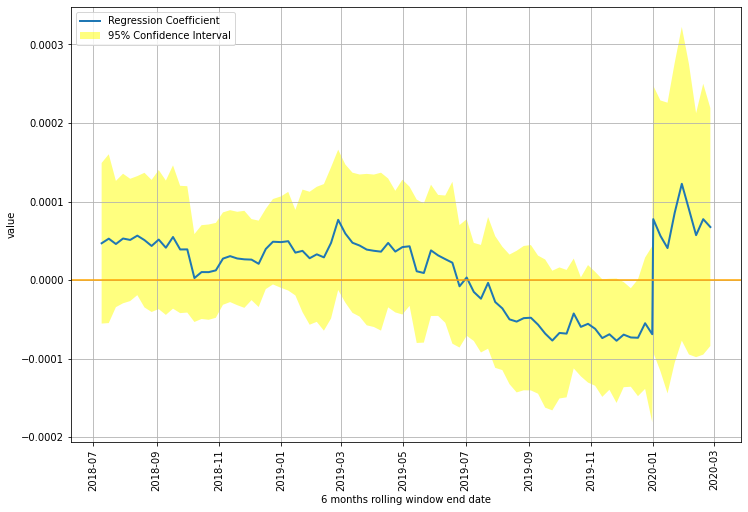

In [15]:
fig, ax = plt.subplots(1, figsize=(12,8))
ax.plot(t, slopes.Estimate, lw=2, label='Regression Coefficient')
ax.fill_between(t, slopes.lb, slopes.ub, facecolor='yellow', alpha=0.5,
                label='95% Confidence Interval')
ax.legend(loc='upper left')
plt.xticks(rotation='vertical')
ax.set_xlabel('6 months rolling window end date')
ax.set_ylabel('value')
ax.axhline(0, color='orange')
ax.grid()

In [12]:
grid_search_folder = '/Users/boyuliu/Dropbox (MIT)/Boyu-Joann/Intermediate output/outputs/grid_search/'

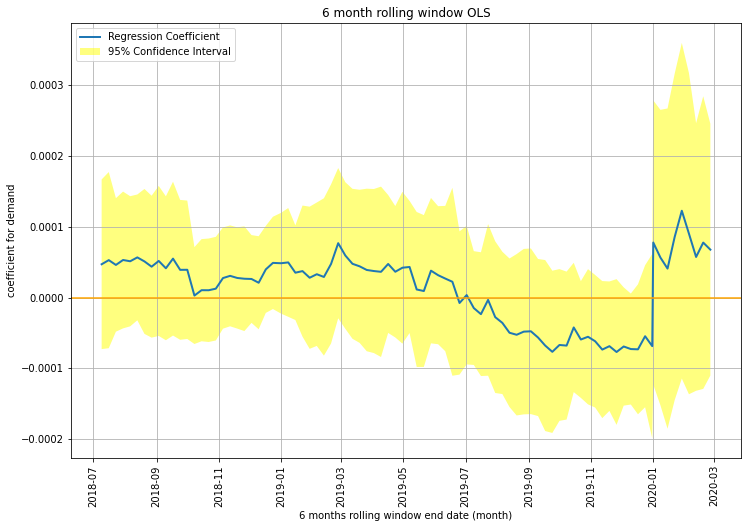

In [16]:
fig, ax = plt.subplots(1, figsize=(12,8))
ax.plot(t, slopes.Estimate, lw=2, label='Regression Coefficient')
ax.fill_between(t, slopes['CI Lower'], slopes['CI Upper'], facecolor='yellow', alpha=0.5,
                label='95% Confidence Interval')
ax.legend(loc='upper left')
plt.xticks(rotation='vertical')
ax.set_xlabel('6 months rolling window end date (month)')
ax.set_ylabel('coefficient for demand')
ax.axhline(0, color='orange')
plt.title('6 month rolling window OLS')
ax.grid()
plt.savefig(grid_search_folder+'6mo_ols.png')
plt.show()

## plot result for causal detrend

In [10]:
result_data = '/Users/boyuliu/Dropbox (MIT)/Boyu-Joann/Intermediate output/outputs/grid_search'\
            '/timed_reg_rolling_6m_ols_causal_detrend.csv'
df = pd.read_csv(result_data)
slopes = df[df.item=='demand_shock'].copy()
slopes['lb'] = slopes['Estimate'] - 1.96*slopes['Std. Error']
slopes['ub'] = slopes['Estimate'] + 1.96*slopes['Std. Error']
print(slopes.shape)

t = [i for i in reg_data.year_week.unique().tolist() if i>'2018-27']
t = list(map(fun, t))
print(len(t))

slopes.head()

(87, 11)
87


,Unnamed: 0,Estimate,Std. Error,t value,Pr(>|t|),CI Lower,CI Upper,DF,item,lb,ub
1,2,-0.001589,0.005994,-0.265082,0.792837,-0.013853,0.010675,28.754225,demand_shock,-0.013338,0.010160
60,61,-0.000988,0.005723,-0.172585,0.864142,-0.012677,0.010702,29.875818,demand_shock,-0.012204,0.010229
119,120,-0.001625,0.004953,-0.328146,0.744966,-0.011719,0.008469,31.596638,demand_shock,-0.011333,0.008083
178,179,-0.000170,0.004868,-0.034936,0.972348,-0.010085,0.009745,31.995288,demand_shock,-0.009710,0.009370
237,238,0.000865,0.004550,0.190194,0.850293,-0.008384,0.010115,33.850598,demand_shock,-0.008053,0.009784


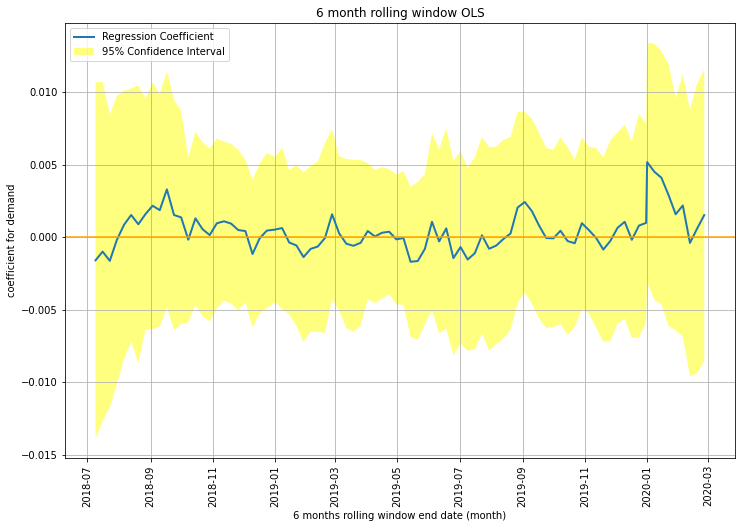

In [13]:
fig, ax = plt.subplots(1, figsize=(12,8))
ax.plot(t, slopes.Estimate, lw=2, label='Regression Coefficient')
ax.fill_between(t, slopes['CI Lower'], slopes['CI Upper'], facecolor='yellow', alpha=0.5,
                label='95% Confidence Interval')
ax.legend(loc='upper left')
plt.xticks(rotation='vertical')
ax.set_xlabel('6 months rolling window end date (month)')
ax.set_ylabel('coefficient for demand')
ax.axhline(0, color='orange')
plt.title('6 month rolling window OLS')
ax.grid()
plt.savefig(grid_search_folder+'6mo_ols_causal_detrend.png')
plt.show()